In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# **Identifie si la séquence est ADN, ARN, Protéines ou Autres.**

In [54]:
def check_sequence_type(sequence):
    """Identifie si la séquence est ADN, ARN, Protéines ou Autres."""
    dna_bases = set("ATCG")
    rna_bases = set("AUCG")
    protein_bases = set("ARNDCEQGHILKMFPSTWYV")

    sequence_set = set(sequence)

    # Vérification stricte que tous les caractères sont de l'ADN
    if sequence_set.issubset(dna_bases):
        return "ADN"
    # Vérification stricte que tous les caractères sont de l'ARN
    elif sequence_set.issubset(rna_bases):
        return "ARN"
    # Vérification stricte que tous les caractères sont des acides aminés (protéines)
    elif sequence_set.issubset(protein_bases):
        return "Protéine"
    # Si la séquence contient des caractères non valides pour ces types, elle est classée "Autre"
    else:
        return "Autre"

def validate_fasta_format(file_path):
    """Vérifie si le fichier a un format FASTA correct."""
    with open(file_path, 'r') as file:
        line_num = 0
        for line in file:
            line = line.strip()
            line_num += 1
            if line.startswith('>'):
                continue  # Il s'agit d'une ligne de description
            elif not all(char.isalpha() or char == '-' for char in line):
                print(f"Erreur : ligne {line_num} contient des caractères invalides.")
                return False
    return True

def check_mixed_sequence_types(sequence_groups):
    """Vérifie si plusieurs types de séquences sont présents dans le fichier."""
    # Compte le nombre de types de séquences non vides
    non_empty_types = [t for t, seqs in sequence_groups.items() if len(seqs) > 0]
    if len(non_empty_types) > 1:
        # Si plus d'un type de séquence est présent, renvoyer une erreur
        print(f"Note : Mélange des séquences de types différents : {', '.join(non_empty_types)}.")
        return False
    return True

def compare_sequences(seq1, seq2):
    """Compare deux séquences si elles sont du même type (ADN, ARN, Protéines, Autre)."""
    valid_chars = set("ATCGUARNDCEQGHILKMFPSTWYV-")
    seq1_filtered = ''.join([char for char in seq1 if char in valid_chars])
    seq2_filtered = ''.join([char for char in seq2 if char in valid_chars])

    # Comparaison des séquences filtrées
    matches = sum(1 for a, b in zip(seq1_filtered, seq2_filtered) if a == b)
    total_length = max(len(seq1_filtered), len(seq2_filtered))
    similarity_percentage = (matches / total_length) * 100 if total_length > 0 else 0

    return similarity_percentage

def read_sequences_from_file(file_path):
    """Lit un fichier, identifie le type des séquences, et les retourne dans des groupes par type."""
    if not validate_fasta_format(file_path):
        print("Le fichier n'est pas au format FASTA correct.")
        return

    sequences = []
    current_sequence = ''

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith('>'):
                if current_sequence:
                    sequences.append(current_sequence)  # Ajouter la séquence précédente
                    current_sequence = ''
            else:
                current_sequence += line  # Continuer d'ajouter à la séquence courante

        if current_sequence:
            sequences.append(current_sequence)  # Ajouter la dernière séquence

    # Organiser les séquences par type
    sequence_types = {"ADN": [], "ARN": [], "Protéine": [], "Autre": []}
    for i, seq in enumerate(sequences):
        seq_type = check_sequence_type(seq)
        sequence_types[seq_type].append(seq)

    return sequence_types

def compare_all_sequences(sequence_groups):
    # Vérifie si plusieurs types de séquences sont présents
    if not check_mixed_sequence_types(sequence_groups):
        return

### Fonction `check_sequence_type`
Cette fonction identifie le type de la séquence en vérifiant si elle correspond à des ensembles spécifiques de caractères :
- **ADN** : contient uniquement les bases `{A, T, C, G}`
- **ARN** : contient les bases `{A, U, C, G}`
- **Protéine** : contient les acides aminés `{A, R, N, D, C, E, Q, G, H, I, L, K, M, F, P, S, T, W, Y, V}`

Elle utilise l'inclusion d'ensembles : la séquence est convertie en un ensemble (`sequence_set`) pour vérifier si tous ses caractères appartiennent à un des ensembles prédéfinis.

---

### Fonction `validate_fasta_format`
Cette fonction assure que le fichier respecte le format FASTA :
- Ignore les lignes de description (commençant par `>`)
- Vérifie que chaque ligne ne contient que des lettres alphabétiques ou le caractère `-`

Cela garantit que le fichier est correctement formaté avant l'analyse.

---

### Fonction `check_mixed_sequence_types`
Cette fonction vérifie la cohérence des types de séquences en comptant les groupes de types non vides :
- Si plusieurs types sont présents, elle renvoie une erreur, car seules des séquences du même type peuvent être comparées.

---

### Fonction `compare_sequences`
Elle mesure la similarité entre deux séquences :
- La similarité est calculée en comptant le nombre de correspondances positionnelles (`matches`) entre les deux séquences filtrées.
- Le pourcentage de similarité est donné par :

$$
\text{similarité} = \frac{\text{nombre de correspondances}}{\text{longueur totale de la séquence}} \times 100
$$

---

### Fonction `read_sequences_from_file`
Cette fonction lit le fichier et identifie les séquences par type :
- Elle commence par vérifier le format FASTA.
- Les séquences sont lues et ajoutées à une liste.
- Chaque séquence est classée dans un dictionnaire par type (`ADN`, `ARN`, `Protéine`, `Autre`) selon son contenu.

---

### Fonction `compare_all_sequences`
Cette fonction compare toutes les paires possibles de séquences d'un même type en utilisant `compare_sequences` :
- Elle assure que chaque type est comparé séparément et affiche la similarité entre les paires de séquences.


In [55]:
file_path = './sequences.txt'
sequences_dict = read_sequences_from_file(file_path)

print("Séquences extraites du fichier:", sequences_dict)

compare_all_sequences(sequences_dict)

Séquences extraites du fichier: {'ADN': ['ATGCGTGGCTAA', 'ATCCGTAGCCTA', 'ATAGCCGTCCTAATTCG'], 'ARN': [], 'Protéine': [], 'Autre': ['ATGVFVHPPJ', 'ATGOUJJKNVCT']}
Note : Mélange des séquences de types différents : ADN, Autre.


In [57]:
def compare_all(sequence_groups):
    """Compare toutes les séquences d'un même type et affiche les similarités entre toutes les paires uniques."""
    # Rassembler toutes les séquences dans une liste unique avec un identifiant global
    all_sequences = []
    sequence_id = 0  # Initialiser l'identifiant global
    
    for seq_type, seqs in sequence_groups.items():
        if len(seqs) > 0:
            print(f"\nType {seq_type} - Séquences :")
            for local_id, seq in enumerate(seqs):
                print(f"  - Séquence {sequence_id + local_id} : {seq}")
                all_sequences.append((sequence_id + local_id, seq))
            sequence_id += len(seqs)  # Mettre à jour sequence_id pour le prochain type
        else:
            print(f"\nType {seq_type} - Aucune séquence trouvée.")
    
    # Comparer chaque paire unique de séquences
    print("\nComparaison des paires uniques de séquences :")
    for i in range(len(all_sequences) - 1):
        for j in range(i + 1, len(all_sequences)):
            num1, seq1 = all_sequences[i]
            num2, seq2 = all_sequences[j]

            try:
                similarity = compare_sequences(seq1, seq2)
                if similarity is not None:
                    print(f"Pourcentage de similarité entre les séquences {num1} et {num2} : {similarity:.2f}%")
                else:
                    print(f"Erreur : Impossible de calculer la similarité entre les séquences {num1} et {num2}.")
            except Exception as e:
                print(f"Erreur lors de la comparaison des séquences {num1} et {num2} : {e}")

compare_all(sequences_dict)



Type ADN - Séquences :
  - Séquence 0 : ATGCGTGGCTAA
  - Séquence 1 : ATCCGTAGCCTA
  - Séquence 2 : ATAGCCGTCCTAATTCG

Type ARN - Aucune séquence trouvée.

Type Protéine - Aucune séquence trouvée.

Type Autre - Séquences :
  - Séquence 3 : ATGVFVHPPJ
  - Séquence 4 : ATGOUJJKNVCT

Comparaison des paires uniques de séquences :
Pourcentage de similarité entre les séquences 0 et 1 : 66.67%
Pourcentage de similarité entre les séquences 0 et 2 : 29.41%
Pourcentage de similarité entre les séquences 0 et 3 : 25.00%
Pourcentage de similarité entre les séquences 0 et 4 : 25.00%
Pourcentage de similarité entre les séquences 1 et 2 : 35.29%
Pourcentage de similarité entre les séquences 1 et 3 : 16.67%
Pourcentage de similarité entre les séquences 1 et 4 : 16.67%
Pourcentage de similarité entre les séquences 2 et 3 : 11.76%
Pourcentage de similarité entre les séquences 2 et 4 : 11.76%
Pourcentage de similarité entre les séquences 3 et 4 : 33.33%


In [58]:
# Combine all sequences into a single list
sequences = [seq for seqs in sequences_dict.values() for seq in seqs]

print(sequences)


['ATGCGTGGCTAA', 'ATCCGTAGCCTA', 'ATAGCCGTCCTAATTCG', 'ATGVFVHPPJ', 'ATGOUJJKNVCT']


In [59]:
# Fonction d'alignement pairwise (Needleman-Wunsch)
def pairwise_alignment(seq1, seq2, match_score=1, mismatch_penalty=-1, gap_penalty=-2):
    n, m = len(seq1), len(seq2)
    matrix = np.zeros((n+1, m+1))

    # Initialisation de la première ligne et colonne
    for i in range(1, n+1):
        matrix[i][0] = i * gap_penalty
    for j in range(1, m+1):
        matrix[0][j] = j * gap_penalty

    # Remplir la matrice de score
    for i in range(1, n+1):
        for j in range(1, m+1):
            match = matrix[i-1][j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_penalty)
            delete = matrix[i-1][j] + gap_penalty
            insert = matrix[i][j-1] + gap_penalty
            matrix[i][j] = max(match, delete, insert)

    # Backtracking pour obtenir l'alignement
    align1, align2 = '', ''
    i, j = n, m
    while i > 0 and j > 0:
        if seq1[i-1] == seq2[j-1] or matrix[i][j] == matrix[i-1][j-1] + match_score:
            align1 = seq1[i-1] + align1
            align2 = seq2[j-1] + align2
            i -= 1
            j -= 1
        elif matrix[i][j] == matrix[i-1][j] + gap_penalty:
            align1 = seq1[i-1] + align1
            align2 = '-' + align2
            i -= 1
        else:
            align1 = '-' + align1
            align2 = seq2[j-1] + align2
            j -= 1
    while i > 0:
        align1 = seq1[i-1] + align1
        align2 = '-' + align2
        i -= 1
    while j > 0:
        align1 = '-' + align1
        align2 = seq2[j-1] + align2
        j -= 1

    return align1, align2

### Fonction `pairwise_alignment` : Alignement pairwise (Needleman-Wunsch)
La fonction `pairwise_alignment` réalise un alignement  entre deux séquences en utilisant l'algorithme de Needleman-Wunsch. Cet algorithme est basé sur la programmation dynamique et est couramment utilisé pour trouver le meilleur alignement  entre deux séquences de longueur similaire.

#### Étapes et Explications

1. **Initialisation des Variables et de la Matrice de Score :**
   - `seq1` et `seq2` : Les deux séquences à aligner.
   - `match_score`, `mismatch_penalty`, `gap_penalty` : Scores pour une correspondance, une incompatibilité, et une insertion d'espace.
   - La matrice de score `matrix` est initialisée avec des zéros, et sa taille est `(n+1, m+1)`, où `n` et `m` sont les longueurs de `seq1` et `seq2`.
   - La première ligne et colonne de la matrice sont remplies en appliquant le score de pénalité d'espace (`gap_penalty`) en fonction de la position. Cela permet de gérer les cas d'alignements ayant des gaps initiaux.

2. **Remplissage de la Matrice de Score :**
   - Pour chaque cellule `(i, j)` de la matrice, trois scores potentiels sont calculés :
     - **Match/Mismatch :** Prend la valeur de la cellule diagonale précédente `(i-1, j-1)` et ajoute le score de correspondance si les caractères sont identiques ou la pénalité d'incompatibilité s'ils diffèrent.
     - **Delete :** Prend la valeur de la cellule au-dessus `(i-1, j)` et ajoute la pénalité d'espace.
     - **Insert :** Prend la valeur de la cellule à gauche `(i, j-1)` et ajoute la pénalité d'espace.
   - La cellule `(i, j)` prend la valeur maximale parmi les trois scores calculés, assurant ainsi la meilleure option d'alignement jusqu'à cette position.

3. **Backtracking pour Obtenir l'Alignement Optimal :**
   - Le parcours commence en bas à droite de la matrice et suit le chemin qui a conduit au meilleur score.
   - Si les caractères des séquences sont identiques ou si le score actuel est obtenu à partir d'une diagonale avec un `match_score`, on aligne les deux caractères.
   - Si le score provient de la cellule supérieure, cela indique une insertion de gap dans `seq2`.
   - Si le score provient de la cellule de gauche, cela signifie une insertion de gap dans `seq1`.

4. **Alignement Final avec Gaps :**
   - Lorsque le bord de la matrice est atteint, des gaps sont ajoutés si une séquence n'est pas complètement alignée.

#### Formule et Mathématiques
Le score de chaque cellule `(i, j)` est donné par :
$$
\text{matrix}[i][j] = \max \begin{cases} 
      \text{matrix}[i-1][j-1] + \text{match\_score} & \text{si } \text{seq1}[i-1] = \text{seq2}[j-1] \\
      \text{matrix}[i-1][j-1] + \text{mismatch\_penalty} & \text{si } \text{seq1}[i-1] \neq \text{seq2}[j-1] \\
      \text{matrix}[i-1][j] + \text{gap\_penalty} & \text{(delete)} \\
      \text{matrix}[i][j-1] + \text{gap\_penalty} & \text{(insert)}
   \end{cases}
$$

Cet algorithme garantit un alignement optimal entre les deux séquences en minimisant les pénalités d'incompatibilités et de gaps.


In [60]:
def calculate_distance_matrix(sequences):
    n = len(sequences)
    distance_matrix = [[0] * n for _ in range(n)]
    for i in range(n):
        print(f"Accès à la séquence {i}: {sequences[i]}")  # Ajoutez cette ligne
        for j in range(i+1, n):
            align1, align2 = pairwise_alignment(sequences[i], sequences[j])
            # Calcul de la distance basé sur les différences
            matches = sum([1 for a, b in zip(align1, align2) if a == b])
            distance = 1 - (matches / max(len(align1), len(align2)))
            distance_matrix[i][j] = distance
    return distance_matrix

### Fonction `calculate_distance_matrix`
La fonction `calculate_distance_matrix` calcule une matrice de distance pour un ensemble de séquences, en utilisant l'alignement pairwise (Needleman-Wunsch) pour chaque paire de séquences. La distance entre deux séquences est calculée en fonction du nombre de différences après alignement.

#### Étapes et Explications

1. **Initialisation de la Matrice de Distance :**
   - La variable `distance_matrix` est une matrice carrée de taille `n x n`, où `n` est le nombre de séquences.
   - Chaque cellule `(i, j)` dans la matrice contiendra la distance entre les séquences `i` et `j`.
   - La diagonale de la matrice reste à zéro car la distance entre une séquence et elle-même est nulle.

2. **Calcul de l'Alignement et de la Distance :**
   - La fonction parcourt chaque paire unique de séquences `i` et `j`, en appelant `pairwise_alignment` pour obtenir l'alignement optimal entre ces séquences.
   - Une fois les alignements `align1` et `align2` obtenus, elle compte les positions où les caractères sont identiques (c’est-à-dire le nombre de "matches").
   - La distance est calculée comme suit :
     $$
     \text{distance} = 1 - \frac{\text{nombre de correspondances}}{\text{longueur maximale de l'alignement}}
     $$
     où `nombre de correspondances` est le nombre de positions identiques entre les deux séquences alignées, et `longueur maximale de l'alignement` est la longueur de la séquence la plus longue dans l'alignement. Cela donne une mesure de dissimilarité entre 0 et 1 :
     - Une distance de 0 signifie que les séquences sont identiques.
     - Une distance proche de 1 indique une grande dissimilarité entre les séquences.

3. **Remplissage de la Matrice :**
   - La distance calculée pour chaque paire `(i, j)` est stockée dans `distance_matrix[i][j]`.
   - Seules les valeurs au-dessus de la diagonale principale sont calculées, car la matrice est symétrique : la distance entre `i` et `j` est la même que celle entre `j` et `i`.

#### Exemple d'Utilisation et Interprétation
La matrice de distance obtenue peut être utilisée pour des analyses de similarité ou pour construire des arbres phylogénétiques dans des études de génétique, où des séquences proches auront des distances faibles et des séquences différentes auront des distances élevées.


In [61]:
# Construction d'un arbre guide simplifié avec UPGMA
def upgma_tree(distance_matrix, sequences):
    clusters = {i: [i] for i in range(len(sequences))}
    while len(clusters) > 1:
        # Trouver les deux clusters les plus proches
        min_dist = float('inf')
        pair_to_merge = None
        for i in clusters:
            for j in clusters:
                if i != j and distance_matrix[i][j] < min_dist:
                    min_dist = distance_matrix[i][j]
                    pair_to_merge = (i, j)

        # Fusionner les deux clusters les plus proches
        i, j = pair_to_merge
        new_cluster = clusters[i] + clusters[j]
        new_index = min(i, j)
        del clusters[i]
        del clusters[j]

        # Mettre à jour la matrice de distances pour le nouveau cluster
        for k in clusters:
            new_distance = (distance_matrix[new_index][k] + distance_matrix[new_index][k]) / 2
            distance_matrix[new_index][k] = new_distance
            distance_matrix[k][new_index] = new_distance

        clusters[new_index] = new_cluster

    return list(clusters.values())[0]  # Retourner l'ordre de fusion des clusters

### Fonction `upgma_tree` : Construction d'un Arbre Guide Simplifié avec UPGMA
La fonction `upgma_tree` utilise l'algorithme UPGMA pour construire un arbre guide simplifié basé sur une matrice de distance. UPGMA est une méthode hiérarchique d'agrégation qui crée un arbre phylogénétique en fusionnant itérativement les clusters les plus proches, en prenant la moyenne des distances.

#### Étapes et Explications

1. **Initialisation des Clusters :**
   - Chaque séquence est initialement considérée comme un cluster unique.
   - Le dictionnaire `clusters` mappe chaque index de séquence à un cluster contenant uniquement cette séquence.

2. **Fusion itérative des Clusters les plus Proches :**
   - Tant qu'il y a plus d'un cluster, la fonction continue à fusionner les deux clusters les plus proches.
   - Elle parcourt la matrice de distance pour trouver la paire `(i, j)` avec la plus petite distance.
   - **Sélection de la paire minimale :** La distance minimale `min_dist` est mise à jour pour chaque paire de clusters distincts `(i, j)` trouvée dans `clusters`.

3. **Mise à Jour des Clusters et Fusion :**
   - Après identification des deux clusters à fusionner, la fonction :
     - Combine les clusters `i` et `j` en un nouveau cluster `new_cluster`.
     - Assigne au nouveau cluster l'index le plus bas (`min(i, j)`) pour simplifier l'indexation.
     - Supprime les clusters `i` et `j` d'origine dans `clusters`.

4. **Mise à Jour de la Matrice de Distance :**
   - Pour chaque autre cluster `k`, la fonction met à jour la distance entre le nouveau cluster fusionné et `k`.
   - **Calcul de la Nouvelle Distance :** La distance entre le nouveau cluster et chaque autre cluster `k` est la moyenne des distances entre `k` et les clusters fusionnés `i` et `j` :
     $$
     \text{new\_distance} = \frac{\text{distance\_matrix[i][k] + distance\_matrix[j][k]}}{2}
     $$

5. **Résultat :**
   - L'arbre est représenté par la liste des fusions successives de clusters.
   - La fonction retourne la liste des clusters finaux, qui représente l'ordre de fusion des séquences dans l'arbre.

#### Interprétation et Utilisation
L'arbre guide généré peut être utilisé pour des analyses phylogénétiques afin de déterminer les relations de similarité entre les séquences. UPGMA est basé sur l'hypothèse de taux d'évolution constants (hypothèse d'horloge moléculaire), ce qui signifie qu'il est adapté aux séquences avec des taux d'évolution similaires.


In [62]:
# Alignement multiple progressif basé sur l'arbre guide
def clustalw_with_guide_tree(sequences):
    distance_matrix = calculate_distance_matrix(sequences)
    guide_tree = upgma_tree(distance_matrix, sequences)

    # Aligner les séquences en fonction de l'arbre guide
    aligned_sequences = [sequences[guide_tree[0]]]
    for index in guide_tree[1:]:
        next_sequence = sequences[index]
        align1, align2 = pairwise_alignment(aligned_sequences[-1], next_sequence)
        aligned_sequences[-1] = align1
        aligned_sequences.append(align2)

    return aligned_sequences

### Fonction `clustalw_with_guide_tree` : Alignement Multiple Progressif Basé sur l'Arbre Guide
La fonction `clustalw_with_guide_tree` réalise un alignement multiple progressif en utilisant un arbre guide généré par la méthode UPGMA. Cet alignement est basé sur l'algorithme ClustalW, qui aligne séquentiellement les séquences en fonction de leur similarité.

#### Étapes et Explications

1. **Calcul de la Matrice de Distance :**
   - La fonction commence par appeler `calculate_distance_matrix` pour obtenir une matrice de distance entre toutes les séquences. Cette matrice est ensuite utilisée pour construire un arbre guide.

2. **Construction de l'Arbre Guide :**
   - En utilisant la fonction `upgma_tree`, un arbre guide est construit. Cet arbre guide détermine l'ordre dans lequel les séquences seront alignées.
   - Les séquences les plus proches dans l'arbre (celles ayant la plus petite distance) seront alignées en premier, en suivant l'ordre hiérarchique défini par l'arbre.

3. **Alignement Progressif des Séquences :**
   - L'alignement débute avec la première séquence du guide (`guide_tree[0]`).
   - Pour chaque séquence dans `guide_tree`, la fonction réalise un alignement pairwise entre l'alignement courant (`aligned_sequences[-1]`) et la séquence suivante (`next_sequence`).
   - Les alignements obtenus (`align1`, `align2`) sont ajoutés à `aligned_sequences`, qui stocke l'alignement progressif des séquences.

4. **Retour de l'Alignement Multiple :**
   - Une fois toutes les séquences alignées selon l'ordre de l'arbre guide, la fonction retourne `aligned_sequences`, qui contient les séquences alignées.

#### Interprétation
L'alignement multiple progressif suit une approche hiérarchique, alignant d'abord les séquences les plus proches, puis ajoutant progressivement les séquences restantes en fonction de leur distance phylogénétique. Cela permet d'obtenir un alignement cohérent en minimisant les erreurs d'alignement introduites par les séquences moins similaires.

Cet alignement multiple est particulièrement utile dans des applications telles que l'analyse phylogénétique, la détection de motifs conservés, et les études d'évolution moléculaire.


In [63]:
aligned_clustalw = clustalw_with_guide_tree(sequences)

print("Alignement multiple avec ClustalW (arbre guide) :")
for seq in aligned_clustalw:
    print(seq)

Accès à la séquence 0: ATGCGTGGCTAA
Accès à la séquence 1: ATCCGTAGCCTA
Accès à la séquence 2: ATAGCCGTCCTAATTCG
Accès à la séquence 3: ATGVFVHPPJ
Accès à la séquence 4: ATGOUJJKNVCT
Alignement multiple avec ClustalW (arbre guide) :
ATG-O-U-J-J-K-N-VCT-
-ATC--C-G-T--A-G-C--C-TA
--ATG------C---G-T-G--G--CT-A-A
-----ATGV---F---V---H---P---P---J-------------
-A-T--AG-C-C-G-T-C-C-T-A-A-T-T-C-G------------


### Fonction `muscle_initial_alignment` : Alignement Initial Séquentiel
La fonction `muscle_initial_alignment` effectue un alignement initial des séquences en utilisant un alignement pairwise (ici basé sur l'algorithme Needleman-Wunsch) de manière séquentielle, en ajoutant chaque nouvelle séquence à l'alignement existant.

#### Étapes et Explications

1. **Initialisation de l'Alignement :**
   - La fonction commence par ajouter la première séquence de `sequences` dans `aligned_sequences`, une liste qui stockera les alignements progressifs.
   - Cette première séquence sert de base pour les alignements successifs.

2. **Alignement Séquentiel :**
   - Pour chaque séquence suivante (`next_sequence`), la fonction utilise la séquence déjà alignée (`current_alignment`, dernier élément de `aligned_sequences`) et applique un alignement pairwise.
   - La fonction `pairwise_alignment` aligne `current_alignment` avec `next_sequence`, renvoyant deux alignements (`align1` et `align2`) :
     - `align1` devient le nouvel alignement pour la séquence courante dans `aligned_sequences`.
     - `align2` est ajouté comme alignement de la séquence suivante.

3. **Retour de l'Alignement :**
   - Une fois toutes les séquences alignées séquentiellement, la fonction retourne `aligned_sequences`, contenant toutes les séquences alignées par rapport à la première séquence.

#### Interprétation et Usage
Cette étape d'alignement initial est couramment utilisée comme première phase dans des algorithmes d'alignement multiple plus complexes, tels que MUSCLE dans notre cas, où l'alignement progressif est affiné dans les étapes suivantes.

L'alignement séquentiel est particulièrement utile pour obtenir un alignement rapide de plusieurs séquences, bien qu'il soit sensible à l'ordre des séquences. Cette méthode permet d'identifier des similarités de base entre les séquences, mais pourrait être moins optimale que les approches d'alignement multiple basées sur des arbres guides pour des alignements finaux.


In [64]:
# Fonction d'alignement initial (déjà fait avec Needleman-Wunsch)
def muscle_initial_alignment(sequences):
    aligned_sequences = [sequences[0]]
    for i in range(1, len(sequences)):
        current_alignment = aligned_sequences[-1]
        next_sequence = sequences[i]
        align1, align2 = pairwise_alignment(current_alignment, next_sequence)
        aligned_sequences[-1] = align1
        aligned_sequences.append(align2)
    return aligned_sequences

In [65]:
# Fonction pour affiner l'alignement
def refine_alignment(sequences):
    for i in range(1, len(sequences)):
        align1, align2 = pairwise_alignment(sequences[i-1], sequences[i])
        sequences[i-1], sequences[i] = align1, align2
    return sequences

# MUSCLE complet avec affinage itératif
def muscle_with_iterations(sequences, iterations=3):
    aligned_sequences = muscle_initial_alignment(sequences)
    for _ in range(iterations):
        aligned_sequences = refine_alignment(aligned_sequences)
    return aligned_sequences

### Fonction `refine_alignment` : Affinement de l'Alignement
La fonction `refine_alignment` affine l'alignement des séquences en alignant chaque paire de séquences adjacentes. Elle permet d'améliorer progressivement l'alignement en ajustant les décalages et les correspondances entre les séquences.

#### Étapes
1. **Alignement des Paires Adjacent :**
   - Pour chaque paire de séquences adjacentes `(i-1, i)`, la fonction utilise `pairwise_alignment` pour recalculer l'alignement, ce qui permet de réduire les écarts et d'optimiser les correspondances.
   - Les séquences `align1` et `align2`, issues de l'alignement entre `sequences[i-1]` et `sequences[i]`, remplacent les séquences d'origine dans `sequences`.
   
2. **Retour :**
   - Une fois toutes les paires affinées, la fonction retourne la liste `sequences` avec les séquences alignées et affinées.

---

### Fonction `muscle_with_iterations` : Alignement Multiple Progressif avec Affinage Itératif
La fonction `muscle_with_iterations` réalise un alignement multiple de type MUSCLE, en utilisant une approche d'alignement initial suivie d'un affinage itératif.

#### Étapes

1. **Alignement Initial :**
   - La fonction commence par un alignement initial des séquences en appelant `muscle_initial_alignment`. Cela fournit une base d'alignement pour l'affinage ultérieur.

2. **Affinage Itératif :**
   - Le paramètre `iterations` définit le nombre d'itérations pour l'affinage. La fonction appelle `refine_alignment` à chaque itération pour ajuster l'alignement des paires de séquences adjacentes.
   - L'affinage itératif permet d'améliorer la précision de l'alignement en réduisant les erreurs d'alignement introduites lors des étapes initiales.

3. **Retour de l'Alignement Final :**
   - Après le nombre d'itérations spécifié, la fonction retourne `aligned_sequences`, qui contient les séquences alignées et optimisées.

#### Interprétation et Usage
L'algorithme MUSCLE (Multiple Sequence Comparison by Log-Expectation) suit ce processus d'affinage itératif pour obtenir un alignement multiple de haute qualité. L'affinage itératif est particulièrement utile pour des analyses génomiques, car il améliore progressivement l'alignement pour minimiser les erreurs et optimiser les correspondances.

Cet alignement itératif rend l'algorithme moins sensible aux erreurs de l'alignement initial, garantissant un alignement final plus précis et robuste pour les séquences biologiques.


In [66]:
aligned_muscle = muscle_with_iterations(sequences)
print("Alignement multiple avec MUSCLE (affinage itératif) :")
for seq in aligned_muscle:
    print(seq)

Alignement multiple avec MUSCLE (affinage itératif) :
--ATG----C--G--T--G-----G----C-------T----A--------------------------------A----
--AT---------------------------C-C------G---T------A--------------G--C-C------------TA-------------
-------A-T-A-----G----C----C-----------------------G------------T-----C----------C-----T----A-----A------T---T---C-G
------------AT------GV-------------------F----V--H--P----P---J-----------------------------------------------------------------
----------------A-T--GO----U----J--------------------------------J---K----N----V----C----T-------------------------------------


# **Visualisation**

1. Visualisation de l'alignement multiple avec des gaps :
Représenter graphiquement les alignements avec des gaps permet de mieux visualiser les correspondances entre les séquences.
Tracer des graphiques où chaque séquence est alignée sur un axe horizontal, en représentant les gaps par des traits ou des espaces vides.

In [67]:
def plot_alignment(aligned_sequences, title="Alignement multiple", font_size=12):
    fig, ax = plt.subplots(figsize=(10, len(aligned_sequences) * 0.8))

    # Choix de couleurs pour rendre les alignements plus lisibles
    colors = {'A': 'red', 'T': 'blue', 'G': 'green', 'C': 'purple', '-': 'black'}

    for i, seq in enumerate(aligned_sequences):
        for j, char in enumerate(seq):
            ax.text(j, -i, char, fontsize=font_size, fontfamily='monospace',
                    fontweight='bold', color=colors.get(char, 'black'))  # Coloration par base

    ax.set_xlim(0, len(aligned_sequences[0]))
    ax.set_ylim(-len(aligned_sequences), 1)
    ax.axis('off')

    plt.title(title, fontsize=16)
    plt.show()

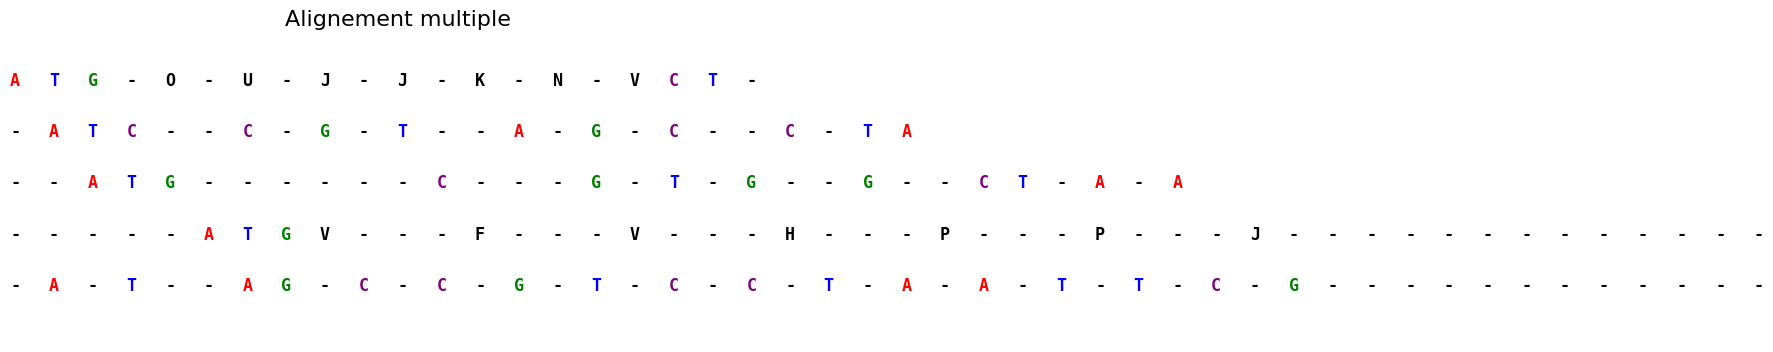

In [68]:
# Affichage de l'alignement ClustalW
plot_alignment(aligned_clustalw)

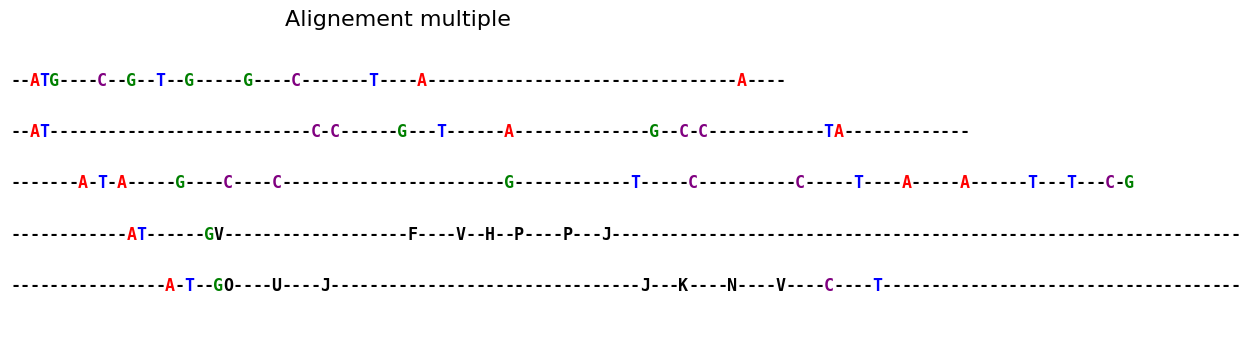

In [69]:
# Affichage de l'alignement MUSCLE
plot_alignment(aligned_muscle)

2. Heatmap de la matrice de distances :
Visualiser la matrice de distances entre les séquences avec une heatmap permet de voir quelles séquences sont les plus similaires ou divergentes.

In [74]:
def plot_distance_matrix(distance_matrix):
    num_sequences = len(distance_matrix)
    labels = [f"Sequence {i}" for i in range(num_sequences)]  

    plt.figure(figsize=(10, 8))  
    sns.heatmap(distance_matrix, annot=True, cmap='Blues', linewidths=0.5, square=True,
                xticklabels=labels, yticklabels=labels)  
    plt.title("Matrice de distance entre les séquences", fontsize=16)
    plt.show()

Accès à la séquence 0: ATGCGTGGCTAA
Accès à la séquence 1: ATCCGTAGCCTA
Accès à la séquence 2: ATAGCCGTCCTAATTCG
Accès à la séquence 3: ATGVFVHPPJ
Accès à la séquence 4: ATGOUJJKNVCT


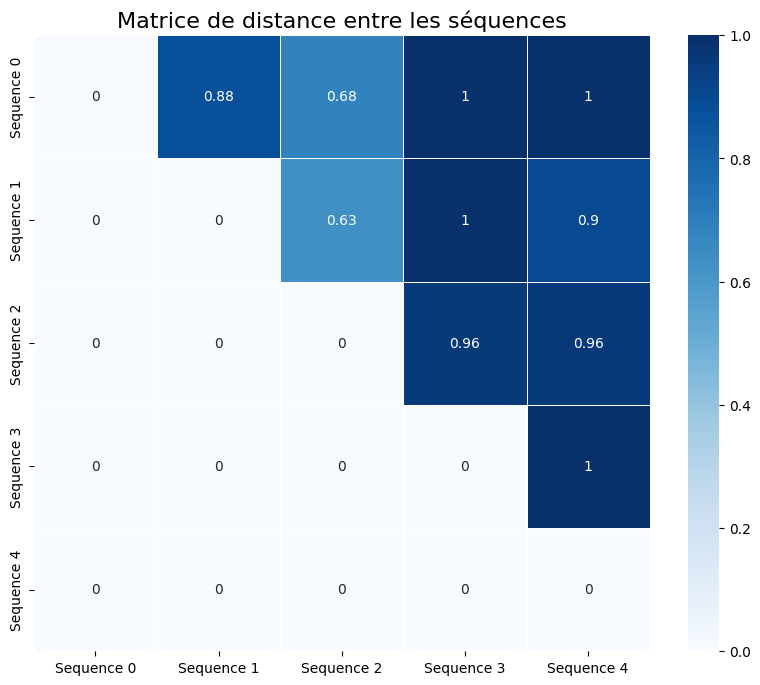

In [75]:
# Affichage de la heatmap pour la matrice de distances
distance_matrix = calculate_distance_matrix(sequences)
plot_distance_matrix(distance_matrix)

### Interprétation des Relations entre Séquences à Travers la Carte Thermique de Distance

1. **Identification des Relations entre Séquences :**
   - La carte thermique fournit une visualisation intuitive pour évaluer les relations entre les séquences en fonction de leurs distances. Les valeurs dans chaque cellule représentent la distance (ou dissimilarité) entre chaque paire de séquences, où des valeurs faibles indiquent une grande similarité et des valeurs élevées signalent une forte dissimilarité.
   - **Interprétation des Couleurs :**
     - La carte utilise une échelle de couleur allant des teintes plus claires aux teintes plus foncées dans la palette `Blues`. 
     - **Teintes Claires (Bleu Clair)** : Les valeurs proches de 0, représentées par des teintes de bleu très clair ou presque blanc, indiquent que les séquences sont très similaires, avec peu de différences entre elles. Ces séquences sont probablement proches en termes de structure ou de fonction, et elles peuvent partager des motifs conservés.
     - **Teintes Moyennes (Bleu)** : Les valeurs intermédiaires, représentées par des bleus moyens, montrent des séquences qui ont des différences notables, mais pas extrêmes. Ces séquences peuvent appartenir à des groupes apparentés, partageant des traits communs avec quelques variations.
     - **Teintes Foncées (Bleu Foncé)** : Les valeurs élevées, indiquées par des teintes de bleu foncé, révèlent des séquences très différentes. Ces paires de séquences ont peu de similarité et pourraient avoir divergé significativement dans leur évolution ou être associées à des fonctions distinctes.

2. **Points de Similarité et Clusters :**
   - **Détection de Clusters** : Les zones de bleu clair regroupées en diagonale ou dans des sous-sections de la matrice peuvent indiquer des clusters de séquences similaires. Ces clusters de similarité révèlent souvent des relations évolutives proches, comme des séquences ayant divergé récemment ou des séquences conservées partageant des fonctions similaires.
     - Par exemple, dans le contexte de séquences d'ADN, de tels clusters peuvent représenter des gènes homologues dans des espèces différentes.
   - **Identification des Séquences Uniques ou Divergentes** : Les cellules isolées en bleu foncé montrent des séquences qui ne se regroupent pas facilement avec d'autres, signalant potentiellement des séquences uniques ou divergentes dans l'ensemble. Ces séquences peuvent être interprétées comme ayant une fonction ou un rôle distinct, ou comme des séquences qui ont divergé plus tôt dans leur histoire évolutive.



3. Calcul de la qualité d'alignement :
Après avoir obtenu les alignements, on peux ajouter une métrique de qualité comme le score d'alignement (nombre de matches par rapport aux mismatches et gaps).
On pourrait calculer un score total pour évaluer la qualité de l'alignement.

In [19]:
def calculate_alignment_score(aligned_sequences, match_score=1, mismatch_penalty=-1, gap_penalty=-2):
    score = 0
    for i in range(len(aligned_sequences[0])):  # Parcourir chaque colonne
        column = [seq[i] for seq in aligned_sequences]
        if len(set(column)) == 1:  # Tous les caractères sont identiques
            score += match_score
        elif '-' in column:  # Il y a un gap
            score += gap_penalty
        else:  # Mismatch
            score += mismatch_penalty
    return score

# Calcul du score pour ClustalW et MUSCLE
clustalw_score = calculate_alignment_score(aligned_clustalw)
muscle_score = calculate_alignment_score(aligned_muscle)

In [20]:
print(f"Score d'alignement ClustalW: {clustalw_score}")
print(f"Score d'alignement MUSCLE: {muscle_score}")

Score d'alignement ClustalW: -40
Score d'alignement MUSCLE: -43


#### Interprétation des Scores pour ClustalW et MUSCLE

- **Score Élevé (Positif)** : Un score élevé indique un alignement de bonne qualité, comportant de nombreux matches (positions identiques dans toutes les séquences). Cela suggère une forte similarité entre les séquences, avec peu de gaps ou mismatches.
  
- **Score Faible (Négatif)** : Un score faible ou négatif indique la présence de nombreux gaps ou mismatches, ce qui peut signifier que les séquences sont moins similaires ou que l’alignement a dû introduire des variations pour maximiser les correspondances.

#### Comparaison des Scores entre ClustalW et MUSCLE

En comparant les scores de ClustalW et MUSCLE, on peut évaluer quel algorithme a produit un alignement plus conservé :

- **Score Plus Élevé pour ClustalW** : Si le score de ClustalW est supérieur, cela signifie que cet algorithme a aligné les séquences de manière plus conservatrice, avec davantage de matches et potentiellement moins de gaps.
  
- **Score Plus Élevé pour MUSCLE** : Si le score de MUSCLE est supérieur, cela indique que cet algorithme a optimisé l’alignement en minimisant les gaps et en équilibrant les mismatches, produisant ainsi un alignement plus adapté aux analyses globales.


4. Comparer les algorithmes (ClustalW vs MUSCLE) :
On pourrait créer une bar chart pour comparer les scores d'alignement obtenus avec ClustalW et MUSCLE.

In [21]:
def compare_alignment_scores(clustalw_score, muscle_score):
    algorithms = ['ClustalW', 'MUSCLE']
    scores = [clustalw_score, muscle_score]

    plt.bar(algorithms, scores, color=['blue', 'green'])
    plt.title("Comparaison des scores d'alignement", fontsize=16)
    plt.ylabel("Score d'alignement")
    plt.show()

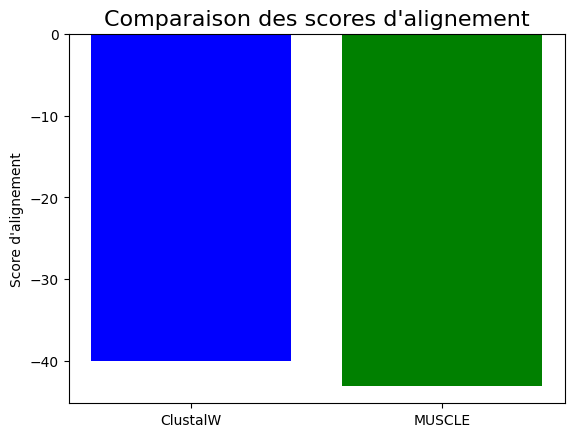

In [22]:
compare_alignment_scores(clustalw_score, muscle_score)

In [23]:
start_time = time.time()
aligned_clustalw = clustalw_with_guide_tree(sequences)
end_time = time.time()

execution_time_clustalw = end_time - start_time
print("ClustalW Execution Time:", execution_time_clustalw, "seconds")

Accès à la séquence 0: ATGCGTGGCTAA
Accès à la séquence 1: ATCCGTAGCCTA
Accès à la séquence 2: ATAGCCGTCCTAATTCG
Accès à la séquence 3: ATGVFVHPPJ
Accès à la séquence 4: ATGOUJJKNVCT
ClustalW Execution Time: 0.00410914421081543 seconds


In [24]:
start_time = time.time()
aligned_muscle = muscle_with_iterations(sequences, iterations=3)
end_time = time.time()

execution_time_muscle = end_time - start_time
print("MUSCLE Execution Time:", execution_time_muscle, "seconds")

MUSCLE Execution Time: 0.053156137466430664 seconds


In [25]:
def alignment_score(align1, align2, match_score=1, mismatch_penalty=-1, gap_penalty=-2):
    score = 0
    for a, b in zip(align1, align2):
        if a == b:
            score += match_score
        elif a == '-' or b == '-':
            score += gap_penalty
        else:
            score += mismatch_penalty
    return score

# Score the final alignment for ClustalW and MUSCLE
clustalw_score = sum([alignment_score(aligned_clustalw[i], aligned_clustalw[i+1]) for i in range(len(aligned_clustalw)-1)])
print("Final ClustalW Alignment Score:", clustalw_score)

muscle_score = sum([alignment_score(aligned_muscle[i], aligned_muscle[i+1]) for i in range(len(aligned_muscle)-1)])
print("Final MUSCLE Alignment Score:", muscle_score)


Final ClustalW Alignment Score: -84
Final MUSCLE Alignment Score: 154


#### Interprétation des Scores Totaux pour ClustalW et MUSCLE

- **Score Total Élevé** : Un score total élevé indique un alignement globalement bon, où les paires de séquences présentent de nombreuses correspondances. Cela reflète une forte similarité entre les séquences dans l’alignement.
  
- **Score Total Faible ou Négatif** : Un score total faible ou négatif indique un alignement avec de nombreux gaps ou mismatches. Cela peut signifier que les séquences sont moins similaires ou que l'alignement a dû introduire des variations pour maximiser les correspondances.

#### Comparaison des Scores entre ClustalW et MUSCLE

En comparant les scores d'alignement total pour ClustalW (`clustalw_score`) et MUSCLE (`muscle_score`), on peut déterminer quel algorithme a produit l’alignement le plus cohérent :

- **Score Plus Élevé pour ClustalW** : Si le score de ClustalW est plus élevé, cela indique que cet algorithme a produit un alignement avec davantage de matches et moins de gaps, suggérant une meilleure conservation des motifs de séquence.
  
- **Score Plus Élevé pour MUSCLE** : Si le score de MUSCLE est plus élevé, cela suggère que cet algorithme a créé un alignement plus optimisé en termes de similarité globale, ce qui peut être préféré pour une vue d’ensemble plus large sans compromis sur les motifs individuels.


Calculer le score pour chaque alignement

In [26]:
# Fonction pour calculer le score d'alignement entre deux séquences alignées
def alignment_score(align1, align2, match_score=1, mismatch_penalty=-1, gap_penalty=-2):
    score = 0
    for a, b in zip(align1, align2):
        if a == b:
            score += match_score
        elif a == '-' or b == '-':
            score += gap_penalty
        else:
            score += mismatch_penalty
    return score

# Calculer le score pour chaque paire unique de séquences
for i in range(len(aligned_clustalw)):
    for j in range(i + 1, len(aligned_clustalw)):
        score = alignment_score(aligned_clustalw[i], aligned_clustalw[j])
        print(f"Score d'alignement ClustalW entre la séquence {i} et {j} : {score}")



Score d'alignement ClustalW entre la séquence 0 et 1 : -17
Score d'alignement ClustalW entre la séquence 0 et 2 : -25
Score d'alignement ClustalW entre la séquence 0 et 3 : -16
Score d'alignement ClustalW entre la séquence 0 et 4 : -32
Score d'alignement ClustalW entre la séquence 1 et 2 : -14
Score d'alignement ClustalW entre la séquence 1 et 3 : -21
Score d'alignement ClustalW entre la séquence 1 et 4 : -14
Score d'alignement ClustalW entre la séquence 2 et 3 : -28
Score d'alignement ClustalW entre la séquence 2 et 4 : -22
Score d'alignement ClustalW entre la séquence 3 et 4 : -25


Génèrer une carte thermique pour visualiser les différences entre deux alignements multiples produits par ClustalW et MUSCLE.

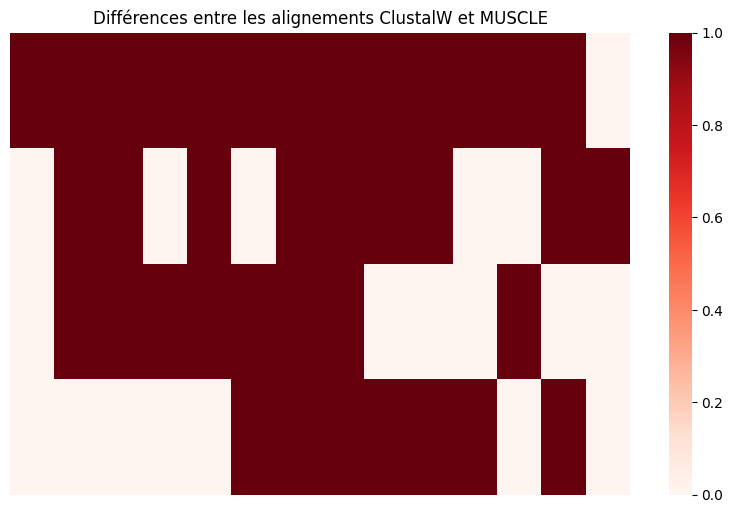

In [ ]:
def compare_alignments_heatmap(aligned_clustalw, aligned_muscle):
    differences = np.zeros((len(aligned_clustalw), len(aligned_clustalw[0])))

    for i in range(len(aligned_clustalw)):
        for j in range(len(aligned_clustalw[0])):
            if aligned_clustalw[i][j] != aligned_muscle[i][j]:
                differences[i][j] = 1  # 1 pour indiquer une différence

    plt.figure(figsize=(10, 6))
    sns.heatmap(differences, cmap="Reds", cbar=True, xticklabels=False, yticklabels=False)
    plt.title("Différences entre les alignements ClustalW et MUSCLE")
    plt.show()

compare_alignments_heatmap(aligned_clustalw, aligned_muscle)


#### Interprétation 

La carte thermique obtenue fournit une vue d’ensemble des positions où les alignements ClustalW et MUSCLE diffèrent. Elle permet une analyse détaillée des régions de similarité et de divergence entre les deux alignements, ce qui peut éclairer les choix d’algorithme et les décisions pour les analyses phylogénétiques et génétiques.

1. **Identification des Régions de Conflit :**
   - **Différences observables :** Les zones rouges représentent des positions où ClustalW et MUSCLE ont produit des alignements divergents. Ces positions, marquées par un `1` dans la matrice de différences, indiquent des substitutions, insertions ou suppressions interprétées différemment par chaque algorithme.
   - **Modélisation mathématique des conflits :** Supposons que chaque alignement se compose de caractères alignés pour des séquences $S_1, S_2, \ldots, S_n$
. Pour chaque position \( j \) et séquence \( i \), la différence entre les alignements $ A_{clustalw}(i, j)$ et $ A_{muscle}(i, j) $ est définie par :
     $$
     D(i, j) = 
     \begin{cases} 
       1 & \text{si } A_{clustalw}(i, j) \neq A_{muscle}(i, j) \\
       0 & \text{si } A_{clustalw}(i, j) = A_{muscle}(i, j)
     \end{cases}
     $$
   - Les conflits peuvent indiquer des difficultés d’alignement dues aux caractéristiques des séquences, telles que les motifs répétitifs ou les régions ambiguës qui perturbent les heuristiques d'alignement.

2. **Conservation et Confiance de l’Alignement :**
   - **Évaluation de la conservation :** Les zones blanches indiquent des positions où les deux algorithmes sont en accord, ce qui implique une conservation plus forte et donc une plus grande fiabilité pour ces positions. Mathématiquement, cela correspond aux positions où \( D(i, j) = 0 \), suggérant que chaque algorithme a attribué les mêmes caractères alignés aux séquences.
   - **Indice de confiance global :** Un indice de conservation \( C(j) \) pour une position \( j \) dans les séquences peut être calculé comme :
     $$
     C(j) = 1 - \frac{\sum_{i=1}^{n} D(i, j)}{n}
     $$
     où \( C(j) \) proche de \( 1 \) indique une haute conservation. Ce type d'indice permet de mesurer mathématiquement la confiance dans les régions alignées, ce qui est essentiel dans les analyses bioinformatiques.

3. **Applications aux Études Phylogénétiques et Comparatives :**
   - **Impact sur les arbres phylogénétiques :** Les différences dans les alignements peuvent affecter la distance évolutive calculée entre les séquences, ce qui influence directement la topologie de l'arbre phylogénétique. Par exemple, des divergences dans les alignements des régions clés peuvent augmenter ou diminuer la distance entre deux séquences, modifiant ainsi leur position relative dans l'arbre.
   - **Détection des régions conservées fonctionnelles :** En identifiant les positions où les alignements sont similaires (zones blanches), cette carte thermique aide à mettre en évidence les motifs conservés, qui sont souvent des indicateurs de structures ou fonctions biologiques importantes. Ces motifs peuvent être modélisés mathématiquement comme des sous-ensembles de positions \( j \) pour lesquelles \( C(j) \) est proche de \( 1 \).

4. **Choix de l'Algorithme en Fonction des Différences :**
   - **Conservation par algorithme :** Si les différences sont concentrées dans certaines régions, cela peut indiquer qu'un algorithme gère mieux certains motifs. Par exemple, ClustalW peut être plus conservateur et préserver les alignements dans les régions stables, tandis que MUSCLE, avec son approche itérative, peut produire des alignements plus flexibles dans des régions variables.
   - **Analyse des biais d’alignement :** La fréquence des différences pour un algorithme donné peut indiquer des biais. Par exemple, en calculant la moyenne des valeurs \( D(i, j) \) pour chaque séquence \( i \), il est possible d'identifier les séquences qui présentent le plus de divergences d'alignement, ce qui aide à adapter le choix de l'algorithme selon les caractéristiques des séquences analysées.

Cette fonction, en produisant une carte thermique, offre un outil visuel et quantitatif pour évaluer la cohérence entre deux alignements. Elle permet d’affiner le choix d'algorithme en fonction de la nature des séquences et de guider les analyses en fonction de l'objectif, qu'il s'agisse de créer des arbres phylogénétiques précis ou de détecter des motifs conservés. En utilisant des indices mathématiques de conservation et de divergence, cette approche fournit des bases solides pour l’interprétation des alignements multiples.


In [27]:
def gap_statistics(aligned_sequences):
    total_gaps = sum(seq.count('-') for seq in aligned_sequences)
    gap_positions = [i for i in range(len(aligned_sequences[0])) if any(seq[i] == '-' for seq in aligned_sequences)]
    return total_gaps, gap_positions

gaps_clustalw, positions_clustalw = gap_statistics(aligned_clustalw)
gaps_muscle, positions_muscle = gap_statistics(aligned_muscle)

print(f"Gaps dans ClustalW : {gaps_clustalw}, Positions des gaps : {positions_clustalw}")
print(f"Gaps dans MUSCLE : {gaps_muscle}, Positions des gaps : {positions_muscle}")

Gaps dans ClustalW : 104, Positions des gaps : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Gaps dans MUSCLE : 486, Positions des gaps : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]


### Fonction `gap_statistics` : Analyse des Gaps dans un Alignement
La fonction `gap_statistics` calcule des statistiques sur les gaps dans un alignement multiple de séquences. Les gaps, souvent introduits pour maximiser les correspondances entre séquences, peuvent fournir des informations importantes sur la cohérence et la qualité de l'alignement.

### Interprétation Générale des Statistiques de Gaps dans les Alignements Multiples

Les gaps (`'-'`) sont essentiels pour maximiser les correspondances dans les alignements multiples, révélant des informations sur la cohérence et la qualité de l'alignement.

#### Importance des Gaps

1. **Quantité de Gaps et Variabilité :**
   - Un nombre élevé de gaps suggère une grande variabilité entre les séquences, tandis qu'un faible nombre indique une similarité structurelle plus élevée.

2. **Localisation des Gaps et Conservation :**
   - Des gaps concentrés indiquent des régions de divergence, tandis que des zones sans gaps sont souvent hautement conservées, essentielles pour des fonctions partagées.

3. **Comparaison des Algorithmes :**
   - Différents algorithmes (ClustalW, MUSCLE) gèrent les gaps de manière unique. ClustalW est conservateur, préservant des motifs, alors que MUSCLE optimise globalement en réduisant les gaps.

4. **Implications Biologiques :**
   - Les gaps peuvent représenter des événements d'évolution (insertions, délétions) et aider à comprendre les relations phylogénétiques et fonctionnelles des séquences.

5. **Confiance et Qualité de l'Alignement :**
   - Un alignement avec des gaps bien placés renforce la confiance dans les zones alignées, tandis que des gaps aléatoires peuvent signaler un manque de qualité.

En résumé, les gaps permettent d’évaluer la cohérence et la robustesse de l’alignement, offrant des indices sur l’évolution, la structure, et la fonction des séquences.


In [28]:
def conserved_regions(aligned_sequences):
    conserved = []
    for i in range(len(aligned_sequences[0])):
        column = [seq[i] for seq in aligned_sequences]
        if len(set(column)) == 1:  # Si toutes les séquences ont le même caractère
            conserved.append(i)
    return conserved

conserved_clustalw = conserved_regions(aligned_clustalw)
conserved_muscle = conserved_regions(aligned_muscle)
print(f"Régions conservées dans ClustalW : {conserved_clustalw}")
print(f"Régions conservées dans MUSCLE : {conserved_muscle}")

Régions conservées dans ClustalW : []
Régions conservées dans MUSCLE : [0, 1, 5, 6, 8, 10, 14, 19, 23, 25, 26, 28, 30, 34, 35, 36, 38, 39, 43, 45, 47, 48, 50, 53, 54, 55, 56, 58, 59, 60, 62, 63, 67, 68, 72, 73, 76, 77, 78]


### Fonction `conserved_regions` : Identification des Régions Conservées

#### Interprétation
- **Régions Conservées :** Les positions conservées représentent des motifs partagés entre les séquences, souvent essentiels pour la fonction ou la structure des molécules.
- **Comparaison des Algorithmes :** La différence de positions conservées entre ClustalW et MUSCLE peut révéler la sensibilité de chaque algorithme à préserver des motifs spécifiques, guidant le choix de l'algorithme selon l'application.

Les régions conservées fournissent ainsi des informations critiques sur les similitudes fonctionnelles entre les séquences.

- Si les résultats montrent que ClustalW conserve davantage de positions, cela pourrait être utile dans des études où la précision des motifs conservés est essentielle.
- Si MUSCLE conserve moins de positions, cela pourrait indiquer un alignement plus flexible, utile pour des études globales où l’on recherche des similitudes générales sans priorité sur les motifs locaux.


### Afficher côte à côte les alignements multiples produits par ClustalW et MUSCLE pour une comparaison visuelle ligne par ligne

In [29]:
def display_comparative_alignments(aligned_clustalw, aligned_muscle):
    print("Alignements comparatifs :")
    for i in range(len(aligned_clustalw)):
        print(f"ClustalW : {aligned_clustalw[i]}")
        print(f"MUSCLE   : {aligned_muscle[i]}")
        print("-" * 50)

display_comparative_alignments(aligned_clustalw, aligned_muscle)

Alignements comparatifs :
ClustalW : ATG-O-U-J-J-K-N-VCT-
MUSCLE   : --ATG----C--G--T--G-----G----C-------T----A--------------------------------A----
--------------------------------------------------
ClustalW : -ATC--C-G-T--A-G-C--C-TA
MUSCLE   : --AT---------------------------C-C------G---T------A--------------G--C-C------------TA-------------
--------------------------------------------------
ClustalW : --ATG------C---G-T-G--G--CT-A-A
MUSCLE   : -------A-T-A-----G----C----C-----------------------G------------T-----C----------C-----T----A-----A------T---T---C-G
--------------------------------------------------
ClustalW : -----ATGV---F---V---H---P---P---J-------------
MUSCLE   : ------------AT------GV-------------------F----V--H--P----P---J-----------------------------------------------------------------
--------------------------------------------------
ClustalW : -A-T--AG-C-C-G-T-C-C-T-A-A-T-T-C-G------------
MUSCLE   : ----------------A-T--GO----U----J-----------------------------

# **Conclusion** 

Ce notebook a été réalisé dans le cadre d'un projet de bio-informatique sous la supervision de la professeure Nadia Tahiri. Ce sujet, choisi par notre groupe, nous a permis d'explorer en profondeur les alignements multiples de séquences en nous concentrant spécifiquement sur les algorithmes ClustalW et MUSCLE. Cette étude comparative a été enrichissante, car elle nous a permis de mieux comprendre non seulement les principes de l’alignement multiple mais également les stratégies distinctes de ClustalW et MUSCLE, ainsi que leurs applications respectives.

#### Résumé des Résultats

1. **Analyse des Gaps :**
   - L'analyse des gaps a montré que ClustalW et MUSCLE appliquent des stratégies différentes pour insérer des gaps dans l'alignement. ClustalW tend à être plus conservateur, ajoutant plus de gaps pour aligner précisément des motifs partagés. MUSCLE, quant à lui, favorise un alignement global avec moins de gaps, cherchant un équilibre entre la conservation des motifs et la fluidité de l'alignement.
   - Cette différence dans le traitement des gaps est cruciale pour des applications spécifiques. Par exemple, un alignement avec moins de gaps est souvent préféré pour des analyses phylogénétiques, car il minimise les distorsions dans les distances évolutives. À l'inverse, un alignement qui privilégie la conservation des motifs (même avec plus de gaps) peut être essentiel pour des études structurales ou fonctionnelles.

2. **Identification des Régions Conservées :**
   - La détection des régions conservées a permis de repérer des positions où toutes les séquences présentent le même caractère, un indicateur de motifs fonctionnels ou structurels importants. Les positions conservées partagées entre ClustalW et MUSCLE représentent des régions de haute similitude, essentielles pour des fonctions biologiques spécifiques, tandis que les différences observées reflètent les sensibilités uniques des algorithmes.
   - Ces régions conservées, particulièrement celles présentes dans les deux alignements, peuvent être ciblées pour des études plus approfondies, telles que l’identification de sites actifs dans les protéines ou la recherche de motifs répétés dans les séquences d’ADN. Ces informations sont précieuses pour la conception de vaccins, la découverte de médicaments, et d’autres applications biomédicales.

3. **Carte Thermique des Différences :**
   - La carte thermique des différences d’alignement entre ClustalW et MUSCLE a fourni une visualisation claire des positions conflictuelles. Les zones rouges mettent en évidence les positions où les alignements divergent, tandis que les zones blanches montrent les régions de consensus entre les algorithmes. Cette visualisation permet d’identifier rapidement les zones stables et les régions plus difficiles à aligner, offrant une compréhension visuelle de la cohérence entre les deux méthodes.
   - Cette comparaison visuelle peut aider à affiner les paramètres d’alignement ou à choisir l’algorithme le plus adapté pour des séquences spécifiques, optimisant ainsi l’interprétation des données.

#### Conclusion et Implications pour la Bioinformatique

Les observations issues de cette analyse soulignent l'importance de choisir l'algorithme d'alignement en fonction de l'objectif de l'étude :
- **ClustalW** est idéal pour les analyses nécessitant une conservation rigoureuse des motifs, par exemple pour identifier des motifs évolutifs ou fonctionnels conservés. Sa propension à introduire des gaps pour maintenir ces motifs peut être bénéfique dans des études où la précision des motifs est cruciale.
- **MUSCLE**, avec son approche plus itérative et fluide, est mieux adapté aux alignements globaux et aux analyses phylogénétiques où une vue d'ensemble sans altération excessive est souhaitée.

En conclusion, ce projet a non seulement approfondi notre compréhension des alignements multiples mais a aussi renforcé nos compétences en bioinformatique. L'approche comparative entre ClustalW et MUSCLE, soutenue par des visualisations et des analyses statistiques, nous a permis de comprendre comment adapter les alignements multiples à différents objectifs de recherche. Nous remercions la professeure Nadia Tahiri pour son encadrement et pour l'opportunité d'apprendre et d'appliquer ces concepts fondamentaux en bioinformatique.